#### 데이터셋 불러오기

In [28]:
import pandas as pd
import numpy as np
import tabulate
from utils import load_data

data_list = ['iris','breast_cancer','wine','penguins','titanic','algerian_forest_fires',
            'breast_cancer_coimbra','heart_failure_clinical_records','seeds','HCV',
            'breast_tissue','digits','MNIST','FashionMNIST','KMNIST']

datasets = dict()
df_info = pd.DataFrame()

num_samples, num_classes, num_input = [], [], []
for data in data_list:
    datasets[data] = load_data(data)
    n = datasets[data]['x'].shape[0]
    m = datasets[data]['x'].shape[1]
    classes = np.unique(datasets[data]['y']).shape[0]
    num_samples.append(n)
    num_classes.append(classes)
    num_input.append(m)

df_info['Dataset'] = data_list
df_info['Number of Samples'] = num_samples
df_info['Number of Classes'] = num_classes
df_info['Number of Input Variables'] = num_input

In [29]:
print(df_info.to_markdown())

|    | Dataset                        |   Number of Samples |   Number of Classes |   Number of Input Variables |
|---:|:-------------------------------|--------------------:|--------------------:|----------------------------:|
|  0 | iris                           |                 150 |                   3 |                           4 |
|  1 | breast_cancer                  |                 569 |                   2 |                          30 |
|  2 | wine                           |                 178 |                   3 |                          13 |
|  3 | penguins                       |                 333 |                   3 |                           7 |
|  4 | titanic                        |                 182 |                   2 |                          23 |
|  5 | algerian_forest_fires          |                 244 |                   2 |                          10 |
|  6 | breast_cancer_coimbra          |                 116 |                   2 |     

#### 실험 설계

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from utils import set_seed

In [10]:
def SVM_experiments(data, kernel, svm_configs={'C':1}):
    seed_list = [0,1,2,3,4,5,6,7,8,9]
    acc_list = []

    for seed in seed_list:
        set_seed(seed)
        
        X_train, X_test, y_train, y_test = train_test_split(data['x'], data['y'], 
                                                            test_size=0.33,
                                                            random_state=seed)
        
        svm = SVC(kernel=kernel, random_state=seed, **svm_configs)
        svm.fit(X_train, y_train)
        pred = svm.predict(X_test)
        
        acc_list.append(accuracy_score(y_test, pred)*100)
    
    return round(np.mean(acc_list),2)

#### 실험 및 실험 결과

In [17]:
import time

df_results = pd.DataFrame()
df_time = pd.DataFrame()

df_results['Dataset'] = data_list
df_time['Dataset'] = data_list

for kernel in ['linear','poly','sigmoid','rbf']:
    acc_list = []
    time_list = []

    if kernel != 'poly':
        for key, data in datasets.items():
            
            s_time = time.time()
            crt_acc = SVM_experiments(data, kernel)
            r_time = time.time() - s_time
            
            acc_list.append(crt_acc)
            time_list.append(r_time)
    
    else:
        for key, data in datasets.items():
            
            degree_acc = []
            s_time = time.time()
            degree_acc.append(SVM_experiments(data, kernel, {'degree':3}))
            degree_acc.append(SVM_experiments(data, kernel, {'degree':5}))
            degree_acc.append(SVM_experiments(data, kernel, {'degree':7}))
            degree_acc.append(SVM_experiments(data, kernel, {'degree':9}))
            degree_acc.append(SVM_experiments(data, kernel, {'degree':11}))
            r_time = (time.time() - s_time)/5
            
            acc_list.append(max(degree_acc))
            time_list.append(r_time)
    
    df_results[kernel] = acc_list
    df_time[kernel] = time_list


In [19]:
print(df_results.to_markdown())

|    | Dataset                        |   linear |   poly |   sigmoid |   rbf |
|---:|:-------------------------------|---------:|-------:|----------:|------:|
|  0 | iris                           |    97.6  |  97.2  |     27.4  | 96.6  |
|  1 | breast_cancer                  |    95.37 |  91.6  |     46.7  | 91.76 |
|  2 | wine                           |    94.92 |  67.8  |     26.78 | 68.81 |
|  3 | penguins                       |    99.45 |  99.55 |     99.73 | 99.45 |
|  4 | titanic                        |   100    |  98.03 |     97.7  | 94.59 |
|  5 | algerian_forest_fires          |    95.93 |  84.2  |     93.33 | 93.21 |
|  6 | breast_cancer_coimbra          |    72.82 |  66.41 |     65.13 | 72.05 |
|  7 | heart_failure_clinical_records |    82.22 |  77.58 |     83.54 | 81.01 |
|  8 | seeds                          |    94.71 |  87.43 |     94.29 | 94.57 |
|  9 | HCV                            |    94.51 |  92.97 |     92.36 | 93.13 |
| 10 | breast_tissue                  | 

In [30]:
print(df_time.to_markdown())

|    | Dataset                        |    linear |      poly |   sigmoid |       rbf |
|---:|:-------------------------------|----------:|----------:|----------:|----------:|
|  0 | iris                           | 0.0129998 | 0.326424  | 0.0190001 | 0.0159991 |
|  1 | breast_cancer                  | 3.53016   | 0.0225989 | 0.0489995 | 0.0340052 |
|  2 | wine                           | 0.295108  | 0.0168794 | 0.0200005 | 0.0169954 |
|  3 | penguins                       | 0.0160055 | 0.0197972 | 0.0139999 | 0.0159717 |
|  4 | titanic                        | 0.0130272 | 0.0160017 | 0.0140002 | 0.0159998 |
|  5 | algerian_forest_fires          | 0.0129726 | 0.0150005 | 0.0139997 | 0.0150001 |
|  6 | breast_cancer_coimbra          | 0.0140071 | 0.0139982 | 0.013     | 0.0129998 |
|  7 | heart_failure_clinical_records | 0.0209594 | 0.0221982 | 0.0250003 | 0.0210276 |
|  8 | seeds                          | 0.014045  | 0.016208  | 0.0129998 | 0.0139725 |
|  9 | HCV                      

In [26]:
print(df_results.rank(method='average', axis=1, ascending=False).to_markdown())

|    |   linear |   poly |   sigmoid |   rbf |
|---:|---------:|-------:|----------:|------:|
|  0 |      1   |      2 |         4 |   3   |
|  1 |      1   |      3 |         4 |   2   |
|  2 |      1   |      3 |         4 |   2   |
|  3 |      3.5 |      2 |         1 |   3.5 |
|  4 |      1   |      2 |         3 |   4   |
|  5 |      1   |      4 |         2 |   3   |
|  6 |      1   |      3 |         4 |   2   |
|  7 |      2   |      4 |         1 |   3   |
|  8 |      1   |      4 |         3 |   2   |
|  9 |      1   |      3 |         4 |   2   |
| 10 |      1   |      4 |         3 |   2   |
| 11 |      3   |      2 |         4 |   1   |
| 12 |      2   |      3 |         4 |   1   |
| 13 |      2   |      3 |         4 |   1   |
| 14 |      3   |      2 |         4 |   1   |


C:\Users\korea\AppData\Local\Temp\ipykernel_42616\488488005.py:1: FutureWarning: Dropping of nuisance columns in DataFrame.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  print(df_results.rank(method='average', axis=1, ascending=False).to_markdown())


In [24]:
df_results.rank(method='average', axis=1, ascending=False).mean()

C:\Users\korea\AppData\Local\Temp\ipykernel_42616\2455313512.py:1: FutureWarning: Dropping of nuisance columns in DataFrame.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  df_results.rank(method='average', axis=1, ascending=False).mean()


linear     1.633333
poly       2.933333
sigmoid    3.266667
rbf        2.166667
dtype: float64

#### 결과 해석

1. 과적합 확인

In [33]:
def overfitting_check(data, kernel, svm_configs={'C':1}):
    seed_list = [0,1,2,3,4,5,6,7,8,9]
    train_acc_list = []
    test_acc_list = []

    for seed in seed_list:
        set_seed(seed)
        
        X_train, X_test, y_train, y_test = train_test_split(data['x'], data['y'], 
                                                            test_size=0.33,
                                                            random_state=seed)
        
        svm = SVC(kernel=kernel, random_state=seed, **svm_configs)
        svm.fit(X_train, y_train)
        
        train_pred = svm.predict(X_train)
        train_acc_list.append(accuracy_score(y_train, train_pred)*100)
        
        test_pred = svm.predict(X_test)
        test_acc_list.append(accuracy_score(y_test, test_pred)*100)
    
    return round(np.mean(train_acc_list),2), round(np.mean(test_acc_list),2)

In [35]:
df_results = pd.DataFrame()

df_results['Dataset'] = data_list

for kernel in ['linear','rbf']:
    train_acc_list = []
    test_acc_list = []

    for key, data in datasets.items():
        
        train_acc, test_acc = overfitting_check(data, kernel)
        
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

    
    df_results[f'{kernel} train acc'] = train_acc_list
    df_results[f'{kernel} test acc'] = test_acc_list

In [36]:
print(df_results.to_markdown())

|    | Dataset                        |   linear train acc |   linear test acc |   rbf train acc |   rbf test acc |
|---:|:-------------------------------|-------------------:|------------------:|----------------:|---------------:|
|  0 | iris                           |              98.3  |             97.6  |           97    |          96.6  |
|  1 | breast_cancer                  |              96.54 |             95.37 |           91.21 |          91.76 |
|  2 | wine                           |              99.75 |             94.92 |           68.57 |          68.81 |
|  3 | penguins                       |              99.82 |             99.45 |           99.6  |          99.45 |
|  4 | titanic                        |             100    |            100    |           99.75 |          94.59 |
|  5 | algerian_forest_fires          |              98.1  |             95.93 |           96.13 |          93.21 |
|  6 | breast_cancer_coimbra          |              76.62 |            

2. 결정경계 시각화

c:\Users\korea\anaconda3\envs\py39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\korea\anaconda3\envs\py39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'rbf kernel')

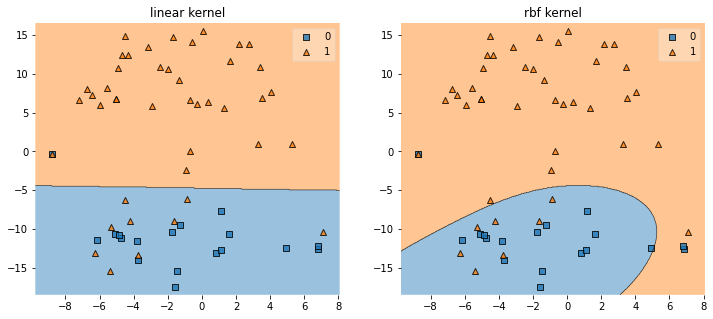

In [85]:
from mlxtend.plotting import plot_decision_regions
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# heart failure clinical records 시각화

data = datasets['titanic']

tsne = TSNE(n_components=2, random_state=0)

X = tsne.fit_transform(data['x'])

X_train, X_test, y_train, y_test = train_test_split(X, data['y'], 
                                                            test_size=0.33,
                                                            random_state=0)

linear_svm = SVC(kernel='linear', random_state=0)
rbf_svm = SVC(kernel='rbf', random_state=0)


linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_decision_regions(X_test, y_test, clf=linear_svm)

plt.title('linear kernel')
plt.subplot(1,2,2)
plot_decision_regions(X_test, y_test, clf=rbf_svm)


plt.title('rbf kernel')